<h1 style='background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding: 20px; border-bottom: 1px solid #11557C;'>
    SQL com Jupyter Notebook  
</h1>

#### Bibliotecas Utilizadas

 - pandas
 - ipython-sql


#### Preparando o Banco de Dados

Para começar, execute o código a seguir. Ele é necessário para preparar o banco de dados e o ambiente para podermos utilizar comandos **SQL** no **Jupyter Notebook**. 
Não se preocupe em entender e interpretar esta parte, o objetivo deste notebook são os comandos SQL das próximas células!

Como requisito, você deve adicionar **```%%sql```** antes de executar um comando SQL, ok?

In [2]:
# Preparando o Banco de Dados

import pandas as pd
import sqlite3 
import os


# --- Criação dos DataFrames ---
# DataFrame de Clientes
dados_clientes = {
    'id_cliente': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'nome': ['João', 'Maria', 'Pedro', 'Ana', 'Carlos', 'Clara', 'Luiz', 'Graziela', 'Beatriz', 'Mariana'],
    'idade': [20, 25, 30, 35, 40, 51, 44, 47, 22, 18],
    'email': ['joao@email.com', 'maria@email.com', 'pedro@email.com', 'ana@email.com', 'carlos@email.com', 'clara@email.com', 'luiz@email.com', 'grazi@email.com', 'bia@email.com', 'mari@email.com'],
    'cidade': ['São Paulo', 'Rio de Janeiro', 'Porto Alegre', 'Belo Horizonte', 'Salvador', 'Recife', 'Santos', 'São Paulo', 'Salvador', 'Guarulhos'],
    'estado': ['SP', 'RJ', 'RS', 'MG', 'BA', 'PE', 'SP', 'SP', 'BA', 'SP']
}

# DataFrame de Pedidos
dados_pedidos = {
    'id_pedido': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'id_cliente': [1, 1, 1, 1, 2, 2, 3, 3, 3, 3, 3, 3, 4, 6, 6],
    'produto': ['celular', 'videogame', 'computador', 'celular', 'videogame', 'televisão', 'computador', 'celular', 'videogame', 'televisão', 'televisão', 'computador', 'celular', 'videogame', 'televisão'],
    'marca': ['ACME', 'XPTO', 'ICOMP', 'ACME', 'XPTO', 'ICOMP', 'ACME', 'XPTO', 'ICOMP', 'ACME','ACME','ACME','XPTO','XPTO','XPTO'],
    'quantidade': [1, 2, 1, 1, 1, 2, 3, 1, 1, 2, 3, 1, 1, 2, 1],
    'preco': [1250.00, 4250.50, 1750.99, 3750.25, 2250.00, 5250.50, 2750.00, 4750.25, 3250.00, 1400.00, 1250.00, 4250.50, 1750.99, 3750.25, 2250.00]
}


clientes_df = pd.DataFrame(dados_clientes)
pedidos_df = pd.DataFrame(dados_pedidos)

print("\n")

# criando a conexão
if os.path.exists('bancodados.db'):   
    print("Banco de Dados 'bancodados.db' OK.")
    try:
        clientes_df.to_sql('tbClientes', conexao)
        pedidos_df.to_sql('tbPedidos', conexao)
    except:
        print("Tabelas 'tbClientes' e 'tbProdutos' OK.")
    %reload_ext sql
else:
    conexao = sqlite3.connect('bancodados.db')

    # criando as  tabelas no banco de dados
    clientes_df.to_sql('tbClientes', conexao)
    pedidos_df.to_sql('tbPedidos', conexao)

    print("Banco de Dados 'bancodados.db' OK.")
    print("Tabelas 'tbClientes' e 'tbProdutos' OK.")
    
    # load the sql module to iPython
    %load_ext sql

# apontando para o banco de dados que vamos usar
%sql sqlite:///bancodados.db



Banco de Dados 'bancodados.db' OK.
Tabelas 'tbClientes' e 'tbProdutos' OK.


----------------
#### Índíce

- [Consultar todos os dados de uma tabela](#secao-1)
- [Consultar os dados de uma ou mais colunas da tabela](#secao-2)
- [Filtrar a pesquisa](#secao-3)
- [Consultar as primeiras linhas](#secao-4)
- [Valores distintos](#secao-5)
- [Contagem de valores distintos](#secao-6)
- [Agrupamento](#secao-7)
- [Ordenação](#secao-8)
- [Contagem de valores únicos](#secao-9)
- [Junções](#secao-10)
- [INNER JOIN](#secao-11)
- [LEFT JOIN](#secao-12)



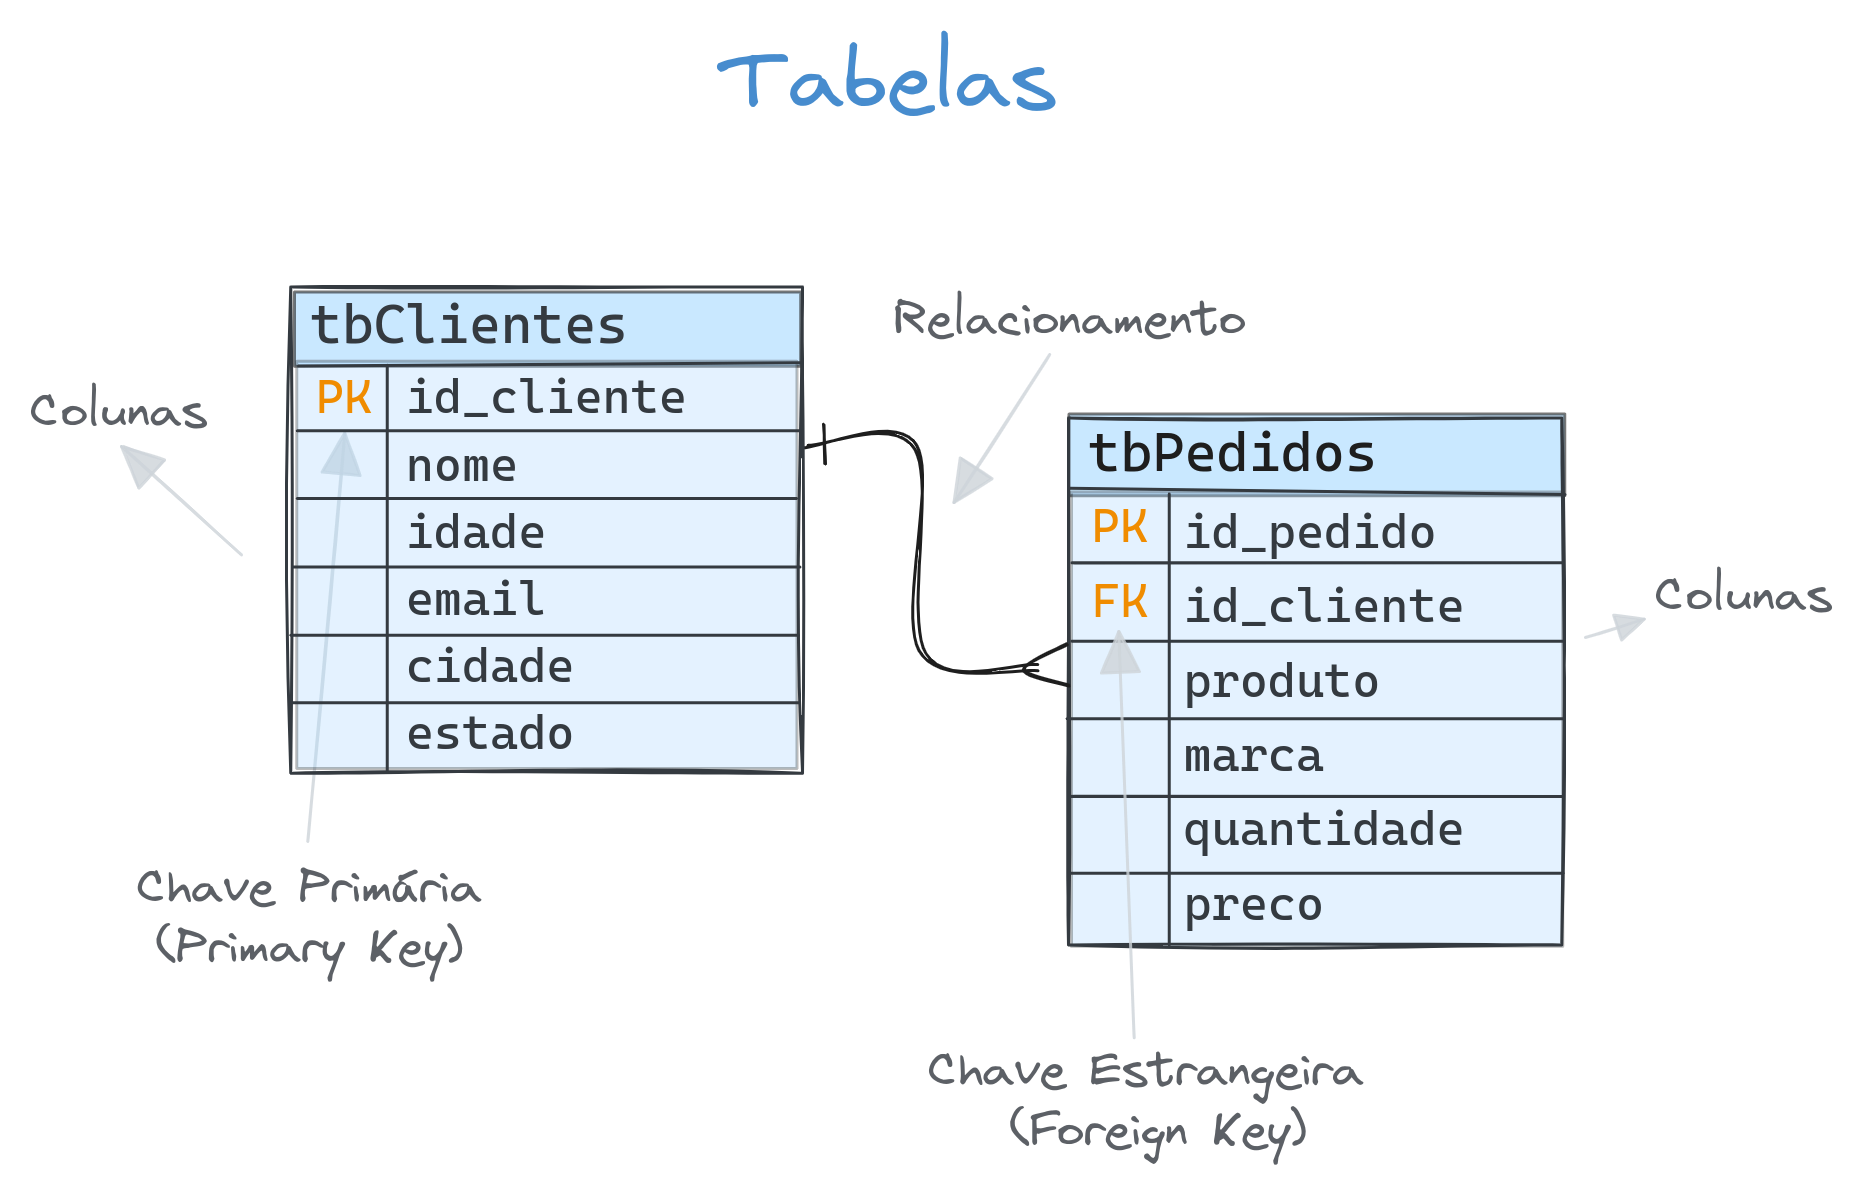
Vamos trabalhar com duas **tabelas**: a tabela de *Clientes* (**tbClientes**) e a tabela de *Pedidos* (**tbPedidos**)

<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-1'></a>Consultar todos os dados de uma tabela  
</h3>

Quem são nossos clientes? Vamos executar o comando a seguir para descobrir!

comando: **```SELECT```** *colunas* **```FROM```** *tabela*

In [9]:
%%sql


SELECT * FROM tbClientes 



 * sqlite:///bancodados.db
Done.


index,id_cliente,nome,idade,email,cidade,estado
0,1,João,20,joao@email.com,São Paulo,SP
1,2,Maria,25,maria@email.com,Rio de Janeiro,RJ
2,3,Pedro,30,pedro@email.com,Porto Alegre,RS
3,4,Ana,35,ana@email.com,Belo Horizonte,MG
4,5,Carlos,40,carlos@email.com,Salvador,BA
5,6,Clara,51,clara@email.com,Recife,PE
6,7,Luiz,44,luiz@email.com,Santos,SP
7,8,Graziela,47,grazi@email.com,São Paulo,SP
8,9,Beatriz,22,bia@email.com,Salvador,BA
9,10,Mariana,18,mari@email.com,Guarulhos,SP


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-2'></a> Consultar os dados de uma ou mais colunas da tabela
</h3>

Quais são os nomes dos clientes? E a idade deles?

In [10]:
%%sql 


SELECT 
    nome 
FROM 
    tbClientes



 * sqlite:///bancodados.db
Done.


nome
João
Maria
Pedro
Ana
Carlos
Clara
Luiz
Graziela
Beatriz
Mariana


In [11]:
%%sql 


SELECT 
    nome, idade 
FROM 
    tbClientes 



 * sqlite:///bancodados.db
Done.


nome,idade
João,20
Maria,25
Pedro,30
Ana,35
Carlos,40
Clara,51
Luiz,44
Graziela,47
Beatriz,22
Mariana,18


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-3'></a> Filtrar a pesquisa
</h3>

Quais clientes têm acima de 30 anos? Quais são do estado de SP?

comando: **```WHERE```** 

In [7]:
%%sql 


SELECT 
    nome,
    idade
FROM 
    tbClientes 
WHERE 
    idade > 30




 * sqlite:///bancodados.db
Done.


nome,idade
Ana,35
Carlos,40
Clara,51
Luiz,44
Graziela,47


In [8]:
%%sql 


SELECT 
    nome,
    idade,
    cidade,
    estado
FROM 
    tbClientes 
WHERE 
    idade > 30
    AND estado = "SP"




 * sqlite:///bancodados.db
Done.


nome,idade,cidade,estado
Luiz,44,Santos,SP
Graziela,47,São Paulo,SP


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-4'></a> Consultar as primeiras linhas
</h3>

Verificando uma amostra dos 5 primeiros registros da tabela

comando: **```LIMIT```**

In [13]:
%%sql 


SELECT 
    nome,
    idade,
    cidade,
    estado
FROM 
    tbClientes 
LIMIT 5



 * sqlite:///bancodados.db
Done.


nome,idade,cidade,estado
João,20,São Paulo,SP
Maria,25,Rio de Janeiro,RJ
Pedro,30,Porto Alegre,RS
Ana,35,Belo Horizonte,MG
Carlos,40,Salvador,BA


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-5'></a> Valores distintos
</h3>

De quais estados são meus clientes?

comando: **```DISTINCT```**

In [15]:
%%sql 


SELECT 
    DISTINCT estado 
FROM 
    tbClientes 



 * sqlite:///bancodados.db
Done.


estado
SP
RJ
RS
MG
BA
PE


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-6'></a> Contagem de valores distintos
</h3>

Quantos estados distintos têm minha tabela de clientes?

comando: **```COUNT```** e **```DISTINCT```**

In [19]:
%%sql 


SELECT 
    COUNT(DISTINCT estado) as qt_estados
FROM 
    tbClientes 



 * sqlite:///bancodados.db
Done.


estado
SP
RJ
RS
MG
BA
PE


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-7'></a> Agrupamento
</h3>

Quantos clientes tenho em cada cidade?

comando: **```GROUP BY```**

In [13]:
%%sql 


SELECT 
    cidade, 
    COUNT(id_cliente) as qt_clientes
FROM 
    tbClientes
GROUP BY 
    Cidade



 * sqlite:///bancodados.db
Done.


cidade,qt_clientes
Belo Horizonte,1
Guarulhos,1
Porto Alegre,1
Recife,1
Rio de Janeiro,1
Salvador,2
Santos,1
São Paulo,2


In [14]:
%%sql 


SELECT 
    cidade, 
    COUNT(id_cliente) as qt_clientes
FROM 
    tbClientes
WHERE 
    idade > 40
GROUP BY 
    Cidade



 * sqlite:///bancodados.db
Done.


cidade,qt_clientes
Recife,1
Santos,1
São Paulo,1


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-8'></a> Ordenação
</h3>


Vamos colocar as coisas em ordem?

comando: **```ORDER BY```** e **```DESC```**

In [20]:
%%sql 


SELECT 
    nome, 
    idade 
FROM 
    tbClientes 
WHERE 
    idade < 25
ORDER BY 
    idade



 * sqlite:///bancodados.db
Done.


nome,idade
Mariana,18
João,20
Beatriz,22


In [21]:
%%sql 


SELECT 
    nome, 
    idade 
FROM 
    tbClientes 
WHERE 
    idade < 25
ORDER BY 
    idade DESC



 * sqlite:///bancodados.db
Done.


nome,idade
Beatriz,22
João,20
Mariana,18


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-9'></a> Contagem de valores únicos
</h3>


Quais cidades tenho mais clientes?

comando: **```COUNT```** + **```GROUP BY```** + **```ORDER BY```**

In [18]:
%%sql


SELECT 
    cidade, 
    COUNT(id_cliente) as qt_clientes 
FROM 
    tbClientes 
GROUP BY 
    cidade 
ORDER BY 
    qt_clientes DESC,
    cidade



 * sqlite:///bancodados.db
Done.


cidade,qt_clientes
Salvador,2
São Paulo,2
Belo Horizonte,1
Guarulhos,1
Porto Alegre,1
Recife,1
Rio de Janeiro,1
Santos,1


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-10'></a> Junções
</h3>

Vamos usar agora a tabela '**tbPedidos**' em conjunto com '**tbClientes**'. 

Consultando todos os registros da tabela de Pedidos:

In [22]:
%%sql 


SELECT 
    * 
FROM 
    tbPedidos 



 * sqlite:///bancodados.db
Done.


index,id_pedido,id_cliente,produto,marca,quantidade,preco
0,1,1,celular,ACME,1,1250.0
1,2,1,videogame,XPTO,2,4250.5
2,3,1,computador,ICOMP,1,1750.99
3,4,1,celular,ACME,1,3750.25
4,5,2,videogame,XPTO,1,2250.0
5,6,2,televisão,ICOMP,2,5250.5
6,7,3,computador,ACME,3,2750.0
7,8,3,celular,XPTO,1,4750.25
8,9,3,videogame,ICOMP,1,3250.0
9,10,3,televisão,ACME,2,1400.0


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-11'></a> INNER JOIN
</h3>

Quais clientes fizeram compras?

comando: **```INNER JOIN```** ou **```JOIN```**

In [23]:
%%sql 

SELECT 
    tbClientes.id_cliente, 
    tbClientes.nome, 
    tbPedidos.id_pedido, 
    tbPedidos.produto, 
    tbPedidos.quantidade, 
    tbPedidos.preco 
FROM tbClientes 
    INNER JOIN tbPedidos ON (tbClientes.id_cliente = tbPedidos.id_cliente)



 * sqlite:///bancodados.db
Done.


id_cliente,nome,id_pedido,produto,quantidade,preco
1,João,1,celular,1,1250.0
1,João,2,videogame,2,4250.5
1,João,3,computador,1,1750.99
1,João,4,celular,1,3750.25
2,Maria,5,videogame,1,2250.0
2,Maria,6,televisão,2,5250.5
3,Pedro,7,computador,3,2750.0
3,Pedro,8,celular,1,4750.25
3,Pedro,9,videogame,1,3250.0
3,Pedro,10,televisão,2,1400.0


<h3 style="background-color: #FAF9F6; color: #11557C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-12'></a> LEFT JOIN
</h3>

Mostre todos os clientes, mesmo os que não fizeram compras.

comando: **```LEFT JOIN```** 

In [24]:
%%sql 


SELECT 
    tbClientes.id_cliente, 
    tbClientes.nome, 
    tbPedidos.id_pedido, 
    tbPedidos.produto, 
    tbPedidos.quantidade, 
    tbPedidos.preco 
FROM tbClientes 
    LEFT JOIN tbPedidos ON (tbClientes.id_cliente = tbPedidos.id_cliente)



 * sqlite:///bancodados.db
Done.


id_cliente,nome,id_pedido,produto,quantidade,preco
1,João,1,celular,1,1250.0
1,João,2,videogame,2,4250.5
1,João,3,computador,1,1750.99
1,João,4,celular,1,3750.25
2,Maria,5,videogame,1,2250.0
2,Maria,6,televisão,2,5250.5
3,Pedro,7,computador,3,2750.0
3,Pedro,8,celular,1,4750.25
3,Pedro,9,videogame,1,3250.0
3,Pedro,10,televisão,2,1400.0


In [25]:
%%sql 


SELECT 
    tbClientes.id_cliente, 
    tbClientes.nome, 
    tbPedidos.id_pedido, 
    tbPedidos.produto, 
    tbPedidos.quantidade, 
    tbPedidos.preco 
FROM tbClientes 
    LEFT JOIN tbPedidos ON (tbClientes.id_cliente = tbPedidos.id_cliente)
WHERE
    tbPedidos.preco > 3000
ORDER BY
    tbPedidos.preco DESC



 * sqlite:///bancodados.db
Done.


id_cliente,nome,id_pedido,produto,quantidade,preco
2,Maria,6,televisão,2,5250.5
3,Pedro,8,celular,1,4750.25
1,João,2,videogame,2,4250.5
3,Pedro,12,computador,1,4250.5
1,João,4,celular,1,3750.25
6,Clara,14,videogame,2,3750.25
3,Pedro,9,videogame,1,3250.0


<h3 style="background-color: #FAF9F6; color: #C2265C; text-align: left; font-family: 'Arial', sans-serif; padding-top: 10px; padding-bottom: 10px; border-bottom: 1px solid #11557C;">
    <a id='secao-12'></a> Agora é sua vez!
</h3>

Realize as suas consultas ao banco de dados na célula abaixo!

In [ ]:
%%sql













--------------
#### Encerrar conexão e apagar banco de dados

Execute a célula abaixo para encerrar a conexão e apagar o banco de dados

In [66]:
try:
    # Fecha a conexão com o banco de dados e apaga o banco de dados
    if os.path.exists('bancodados.db'):     
        conexao.close()  
        os.remove('bancodados.db')
        print("Banco de dados 'bancodados.db' foi encerrado com sucesso.")
    else:
        print("O banco de dados 'bancodados.db' não existe.")
except:
    print("Acesso Negado: Não foi possível realizar a exclusão do bando de dados.")

print("Obrigado!")

O banco de dados 'bancodados.db' não existe.
Obrigado!
